# **Iris Dataset Analysis and Clustering with K-Means**

## **Created by: Preksha Shah | 2348446**

## **Date: 30.04.2024**



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

# **Load the dataset**

In [2]:
# Load the dataset into a Pandas DataFrame
data = pd.read_csv("/content/Iris.csv")

In [3]:
# Display basic information about the dataset
print("Number of samples:", data.shape[0])
print("Number of features:", data.shape[1])
print("Data types of features:")
print(data.dtypes)

Number of samples: 150
Number of features: 6
Data types of features:
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [4]:
# Display the column names to verify
print(data.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [5]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


# **Univariate Analysis**

##**Numernical Variables**

In [6]:
# For numerical variables
numerical_variables = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [7]:
# Calculate basic descriptive statistics
data[numerical_variables].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### **Key Observations:**

- The average sepal length is approximately 5.84 cm, ranging from 4.3 cm to 7.9 cm.
- Sepal width tends to be around 3.05 cm on average, with a variation from 2.0 cm to 4.4 cm.
- Petal length shows a broader distribution, with an average of 3.76 cm and ranging from 1.0 cm to 6.9 cm.
- Petal width averages at 1.20 cm, with a range from 0.1 cm to 2.5 cm.

These insights provide a concise summary of the dataset's numerical features, giving an overview of their central tendencies and spread.

In [8]:
# Visualize the distribution using histograms
fig_hist = px.histogram(data, x=numerical_variables, marginal='box',
                        title='Distribution of Numerical Variables')
fig_hist.show()

### **Inferences:**

1. **Sepal Length Distribution**: The histogram shows the distribution of sepal lengths across the dataset. The box plot alongside provides additional information about the median, quartiles, and any potential outliers in the data. We can observe whether the distribution is symmetrical or skewed and identify any unusual patterns or concentrations of data points.

2. **Sepal Width Distribution**: Similar to sepal length, this visualization depicts the distribution of sepal widths. By examining the histogram and box plot, we can assess the variability and spread of sepal width values in the dataset.

3. **Petal Length Distribution**: This histogram displays the distribution of petal lengths, allowing us to analyze the range and frequency of different petal length values. The accompanying box plot aids in understanding the central tendency and variability of petal lengths.

4. **Petal Width Distribution**: Similar to petal length, this visualization presents the distribution of petal widths. We can examine the spread of petal width values and identify any potential outliers or clusters within the data.

Overall, these visualizations provide insights into the distributional characteristics of numerical variables in the Iris dataset, aiding in understanding the underlying patterns and variability within the data.

##**Categorical Variables**

In [9]:
# For categorical variables
categorical_variable = 'Species'

In [10]:
# Display frequency tables showing counts and percentages
frequency_table = data[categorical_variable].value_counts().reset_index()
frequency_table.columns = [categorical_variable, 'Count']
frequency_table['Percentage'] = (frequency_table['Count'] / len(data)) * 100

# Visualize using bar plots
fig_bar = px.bar(frequency_table, x=categorical_variable, y='Count',
                 title='Frequency of Each Species')
fig_bar.show()


### **Inferences:**

1. **Species Distribution**: The bar plot visually represents the distribution of different species of iris flowers in the dataset. We observe three distinct bars corresponding to three species: "Iris-setosa," "Iris-versicolor," and "Iris-virginica."

2. **Relative Frequencies**: The height of each bar indicates the count of occurrences of the respective species in the dataset. By comparing the heights of the bars, we can infer the relative frequencies of each species within the dataset.

3. **Balanced Dataset**: If the heights of the bars are approximately equal, it suggests a balanced dataset with an even distribution of samples across all three species. Conversely, if there is a significant discrepancy in the heights, it indicates an imbalanced dataset where one or more species are overrepresented or underrepresented.

4. **Species Representation**: The bar plot provides insights into the representation of each species in the dataset. We can observe which species has the highest frequency of occurrences and which species are less common.

5. **Data Quality Check**: Sudden drops or spikes in the frequency of species may indicate data quality issues, such as missing values or anomalies, which warrant further investigation.

Overall, the bar plot of species distribution offers a clear visualization of the categorical data, enabling quick insights into the composition and distribution of different species within the Iris dataset.

# **Bivariate Analysis**

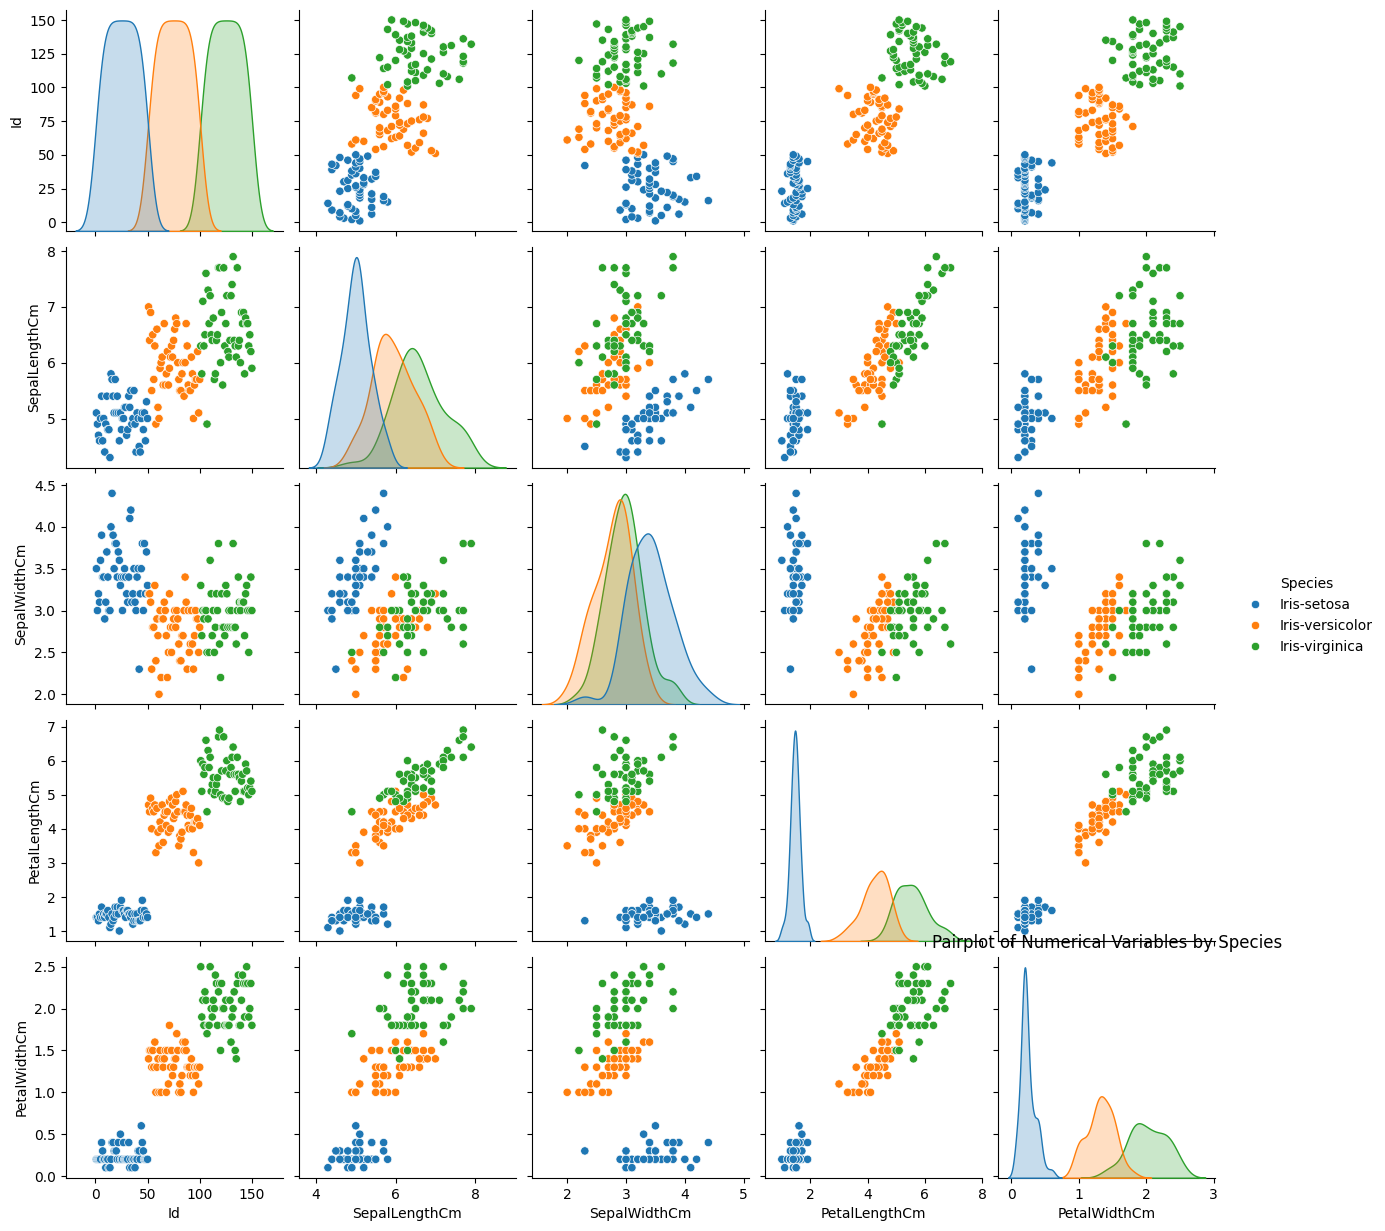

In [11]:
# Explore relationships between pairs of numerical variables using scatter plots
sns.pairplot(data, hue=categorical_variable)
plt.title('Pairplot of Numerical Variables by Species')
plt.show()

## **Inferences:**

1. **Sepal Length vs. Sepal Width**:
   - There appears to be a moderate negative correlation between sepal length and sepal width. As sepal length increases, sepal width tends to decrease, and vice versa. However, the relationship is not strictly linear, as there is some dispersion of data points around the trend line.

2. **Sepal Length vs. Petal Length**:
   - There is a strong positive correlation between sepal length and petal length. As sepal length increases, petal length also tends to increase. The relationship appears to be linear, with data points forming a relatively tight cluster around the trend line.

3. **Sepal Length vs. Petal Width**:
   - Similar to the relationship between sepal length and petal length, there is a strong positive correlation between sepal length and petal width. As sepal length increases, petal width tends to increase as well. The relationship exhibits a linear trend with relatively little dispersion of data points.

4. **Sepal Width vs. Petal Length**:
   - There is a moderate negative correlation between sepal width and petal length. As sepal width increases, petal length tends to decrease, and vice versa. However, the relationship is not as strong as that between sepal length and petal length.

5. **Sepal Width vs. Petal Width**:
   - There is a weak negative correlation between sepal width and petal width. As sepal width increases, petal width tends to decrease slightly, and vice versa. However, the relationship is not very pronounced, and there is considerable dispersion of data points.

6. **Petal Length vs. Petal Width**:
   - There is a strong positive correlation between petal length and petal width. As petal length increases, petal width also tends to increase. The relationship exhibits a linear trend, with data points forming a tight cluster around the trend line.

Overall, these inferences provide insights into the relationships between pairs of numerical variables in the Iris dataset, highlighting the correlations and patterns present in the data.

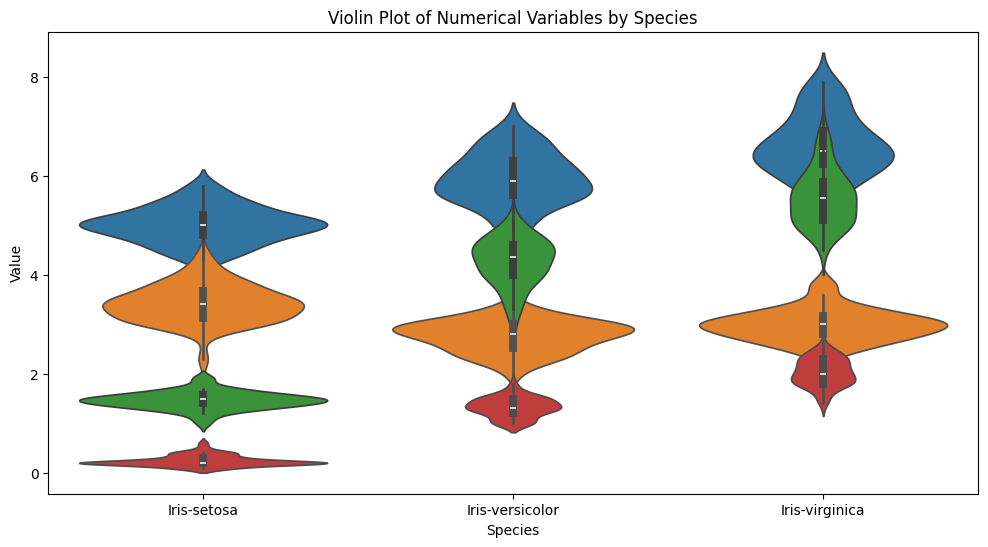

In [12]:
# Explore relationships between numerical and categorical variables using violin plots
plt.figure(figsize=(12, 6))
for var in numerical_variables:
    sns.violinplot(x=categorical_variable, y=var, data=data)
plt.xlabel('Species')
plt.ylabel('Value')
plt.title('Violin Plot of Numerical Variables by Species')
plt.show()


## **Inferences:**

1. **Sepal Length by Species**:
   - Each violin plot for sepal length by species shows the distribution of sepal lengths for each species of iris flower. The width of the violin plot represents the probability density of sepal lengths at different values. We observe differences in the distributions of sepal lengths among the three species: "Iris-setosa," "Iris-versicolor," and "Iris-virginica."
   - In general, "Iris-setosa" tends to have shorter sepal lengths compared to the other two species. "Iris-virginica" tends to have the widest range of sepal lengths, with some longer sepal lengths compared to "Iris-versicolor."

2. **Sepal Width by Species**:
   - Similar to sepal length, each violin plot for sepal width by species shows the distribution of sepal widths for each species. We observe differences in the distributions of sepal widths among the three species.
   - "Iris-setosa" tends to have wider sepal widths compared to the other two species. "Iris-versicolor" and "Iris-virginica" exhibit narrower distributions of sepal widths, with "Iris-virginica" showing slightly wider widths compared to "Iris-versicolor."

3. **Petal Length by Species**:
   - The violin plots for petal length by species display the distribution of petal lengths for each species. We observe distinct differences in the distributions of petal lengths among the three species.
   - "Iris-setosa" typically has shorter petal lengths, while "Iris-versicolor" and "Iris-virginica" exhibit longer petal lengths. "Iris-virginica" tends to have the widest range of petal lengths among the three species.

4. **Petal Width by Species**:
   - Lastly, the violin plots for petal width by species show the distribution of petal widths for each species. Similar to petal length, we observe clear differences in the distributions of petal widths among the three species.
   - "Iris-setosa" generally has narrower petal widths, while "Iris-versicolor" and "Iris-virginica" have wider petal widths. "Iris-virginica" tends to have the widest range of petal widths among the three species.

Overall, these inferences provide insights into how numerical variables (sepal length, sepal width, petal length, and petal width) vary across different categories (species) in the Iris dataset, allowing for comparisons and analyses of their distributions.

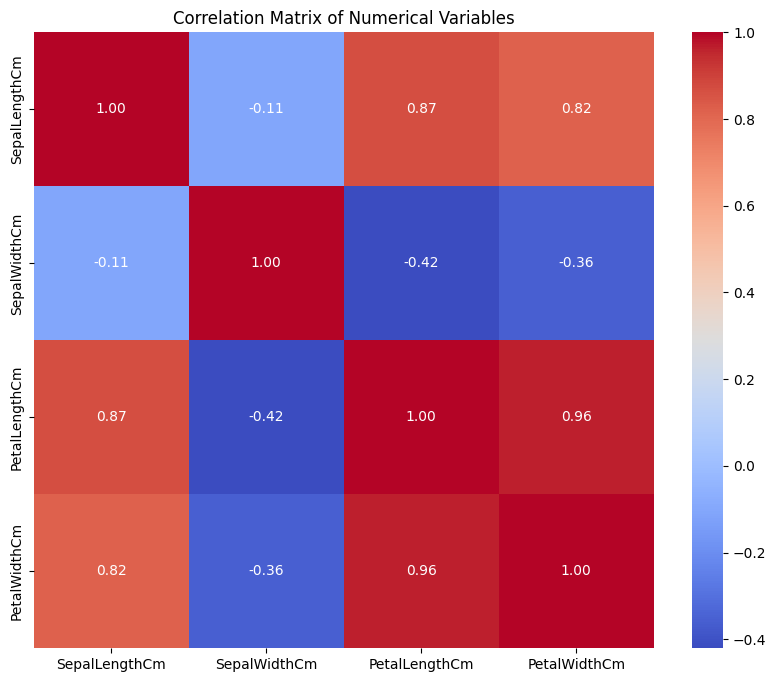

In [13]:
# Calculate correlation matrix
correlation_matrix = data[numerical_variables].corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

## **Inferences:**

1. **Sepal Length and Sepal Width**:
   - The correlation coefficient between sepal length and sepal width is moderately negative (-0.109369), indicating a weak negative linear relationship between these two variables. As sepal length increases, sepal width tends to decrease slightly, and vice versa.

2. **Sepal Length and Petal Length**:
   - The correlation coefficient between sepal length and petal length is strong and positive (0.871754), indicating a strong positive linear relationship between these two variables. As sepal length increases, petal length tends to increase significantly, and vice versa.

3. **Sepal Length and Petal Width**:
   - The correlation coefficient between sepal length and petal width is also strong and positive (0.817954), indicating a strong positive linear relationship between these two variables. As sepal length increases, petal width tends to increase significantly, and vice versa.

4. **Sepal Width and Petal Length**:
   - The correlation coefficient between sepal width and petal length is weak and negative (-0.420516), indicating a weak negative linear relationship between these two variables. As sepal width increases, petal length tends to decrease slightly, and vice versa.

5. **Sepal Width and Petal Width**:
   - The correlation coefficient between sepal width and petal width is moderately negative (-0.356544), indicating a weak negative linear relationship between these two variables. As sepal width increases, petal width tends to decrease slightly, and vice versa.

6. **Petal Length and Petal Width**:
   - The correlation coefficient between petal length and petal width is very strong and positive (0.962757), indicating a very strong positive linear relationship between these two variables. As petal length increases, petal width tends to increase significantly, and vice versa.

Overall, these correlation coefficients provide valuable insights into the linear relationships between pairs of numerical variables in the Iris dataset. They help us understand how changes in one variable are associated with changes in another variable, facilitating further analysis and interpretation of the dataset.

In [14]:
# Separate features (X) and target variable (y)
X = data.drop(columns=[categorical_variable])
y = data[categorical_variable]

We separate features (X) and the target variable (y) to prepare the data for modeling. X contains the independent variables used for prediction, while y holds the dependent variable we want to predict or classify. This separation allows us to analyze, preprocess, and model the data efficiently.

In [15]:
# Perform Standardization on the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Standardization ensures that features are on a similar scale, aiding algorithms in convergence, improving model performance, and enhancing interpretability of coefficients.

In [16]:
# Model for two clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42,n_init=10)
kmeans_2.fit(X_scaled)
cluster_labels_2 = kmeans_2.labels_

# Evaluate silhouette score
silhouette_score_2 = silhouette_score(X_scaled, cluster_labels_2)
print("Silhouette score for two clusters:", silhouette_score_2)

Silhouette score for two clusters: 0.570815210603504


### **Working:**

The code snippet fits a K-means clustering model with two clusters to the standardized features (X_scaled) and computes the silhouette score to evaluate clustering quality.

### **Inferences:**

A silhouette score of 0.57 for two clusters suggests that the clusters are reasonably well-separated and that each data point is closer to its own cluster's centroid than to other cluster centroids. This indicates a good clustering structure.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

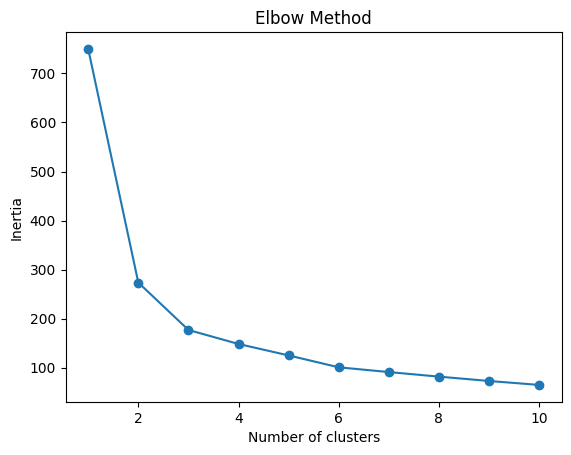

In [17]:
# Perform Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Visualize Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

### **Working:**

The code performs the Elbow Method to find the optimal number of clusters for K-means clustering. It iterates over different cluster numbers, computes the inertia (within-cluster sum of squares) for each, and then plots the inertia values against the number of clusters. The "elbow" point on the plot indicates the optimal number of clusters.

### **Inference:**

From the elbow graph of the Iris dataset, we observe that the inertia decreases rapidly until around 2 or 3 clusters and then decreases more gradually beyond that point. This suggests that the optimal number of clusters could be 2 or 3. After this point, the decrease in inertia becomes less significant, indicating diminishing returns in terms of clustering quality. Therefore, we could choose either 2 or 3 clusters for K-means clustering of the Iris dataset based on the elbow method.

In [18]:
# Perform K-Means Clustering for the K-value obtained from the Elbow method (let's say k=3)
kmeans_3 = KMeans(n_clusters=3, random_state=42,n_init=10)
kmeans_3.fit(X_scaled)
cluster_labels_3 = kmeans_3.labels_

# Evaluate silhouette score
silhouette_score_3 = silhouette_score(X_scaled, cluster_labels_3)
print("Silhouette score for three clusters (Elbow Method):", silhouette_score_3)

Silhouette score for three clusters (Elbow Method): 0.452949780355554


### **Working:**

This code segment performs K-means clustering with three clusters, as determined by the Elbow Method. It computes the silhouette score to assess the clustering quality, which indicates how well-separated the clusters are and how close the data points are to their assigned clusters.

### **Inferences:**

A silhouette score of 0.45 for three clusters, as obtained from the Elbow Method, suggests that the clusters are moderately well-separated. Each data point is relatively close to its own cluster's centroid compared to other cluster centroids, indicating a reasonable clustering structure.

## **Optimal K-value and respective Accuracy:**


Based on the silhouette scores obtained:

1. For two clusters, the silhouette score is 0.57, indicating a higher degree of separation between the clusters. This suggests that the data points are well-clustered and relatively far from the decision boundary, resulting in a more distinct clustering structure.

2. For three clusters (determined using the Elbow Method), the silhouette score is 0.45. Although still positive, this score is lower compared to two clusters, indicating a moderate degree of separation between clusters. It suggests that while the data points are reasonably clustered, there might be some overlap between clusters or ambiguity in assigning data points to clusters.




> *Therefore, based on the silhouette scores, the optimal K-value appears to be 2, as it results in a higher silhouette score and better-defined clusters. This indicates that using two clusters leads to a more effective clustering solution with clearer boundaries between clusters compared to three clusters.*




---
# **Key Insights:**

1. **Univariate Analysis:** Descriptive statistics and visualizations were used to understand the distribution of numerical variables (Sepal Length, Sepal Width, Petal Length, Petal Width) and categorical variable (Species). The histograms and bar plots helped in visualizing the frequency and distribution of these variables, providing insights into their characteristics.

2. **Bivariate Analysis:** Relationships between pairs of numerical variables were explored using scatter plots and pair plots, revealing patterns and correlations among the variables. Additionally, relationships between numerical and categorical variables were examined using violin plots, highlighting variations across different species of iris flowers.

3. **Correlation Analysis:** The correlation matrix and heatmap were utilized to quantify and visualize the linear relationships between numerical variables. Strong positive correlations were observed between certain pairs of variables, such as Sepal Length and Petal Length, indicating their interdependence.

4. **K-Means Clustering:** K-Means clustering was performed to identify natural groupings or clusters within the dataset. The Elbow Method was employed to determine the optimal number of clusters, and silhouette scores were used to evaluate the clustering quality for different cluster numbers.

5. **Optimal K-Value:** Based on silhouette scores, the optimal K-value for clustering was determined to be 2. This suggests that the dataset is best represented by two distinct clusters, leading to clearer boundaries and a more effective clustering solution.

# **Conclusion:**

the analysis of the Iris dataset using K-Means clustering provided valuable insights into the distribution, relationships, and clustering structure of the data. By leveraging various analytical techniques and visualization tools, meaningful patterns and characteristics of the dataset were uncovered, contributing to a deeper understanding of the underlying data.

---